In [3]:
# !pip install opencv-python
# !pip install mediapipe
# !pip install scikit-learn

# 1. Importing libraries and defining dataset

In [4]:
# For capturing hand coordinates
import cv2
import mediapipe as mp

# For processing data
import pandas as pd
import numpy as np

In [5]:
dataset = pd.read_csv('./Dataset/hand_dataset_1000_24.csv')

# Show dataset first five data
dataset.head()

,class,x1,y1,x2,y2,x3,y3,x4,y4,x5,...,x17,y17,x18,y18,x19,y19,x20,y20,x21,y21
0,A,0.295849,0.679613,0.209038,0.612926,0.147883,0.522415,0.125748,0.439133,0.130589,...,0.295946,0.572083,0.362726,0.507097,0.362393,0.452241,0.351849,0.504388,0.340516,0.553928
1,A,0.277914,0.728127,0.168684,0.634556,0.107125,0.489586,0.104561,0.368203,0.126103,...,0.284394,0.614332,0.458914,0.482608,0.402338,0.455794,0.359927,0.538472,0.352813,0.605610
2,A,0.273304,0.750424,0.153818,0.649119,0.087932,0.492969,0.090790,0.370735,0.114260,...,0.292044,0.643904,0.450758,0.495144,0.392497,0.475129,0.353110,0.558542,0.348972,0.624010
3,A,0.260779,0.758578,0.142449,0.658145,0.081542,0.496756,0.090102,0.373770,0.115699,...,0.282037,0.659344,0.449754,0.502502,0.380867,0.484203,0.343782,0.567716,0.341316,0.632237
4,A,0.264733,0.761643,0.144033,0.670212,0.077731,0.505519,0.080886,0.379795,0.101522,...,0.289165,0.674617,0.432672,0.504809,0.386974,0.488224,0.355972,0.573528,0.350644,0.638745


In [6]:
# Show dataset overview, should return 1000 for each alphabet (excluding y and z)
dataset['class'].value_counts()

class
A    1000
B    1000
X    1000
W    1000
V    1000
U    1000
T    1000
S    1000
R    1000
Q    1000
P    1000
O    1000
N    1000
M    1000
L    1000
K    1000
I    1000
H    1000
G    1000
F    1000
E    1000
D    1000
C    1000
Y    1000
Name: count, dtype: int64

# 2. Creating Train and Test Data
- We use *train_test_split* since we don't really have test dataset.
- Normalizing dataset can be ignored, since we predict our data directly using raw handlandmark. 

In [7]:
# Defining X and Y from dataset for training and testing

X = dataset.iloc[:, 1:].values
Y = dataset.iloc[:, 0].values

In [8]:
from sklearn.model_selection import train_test_split

# We will take 33% from 1000 for our test data.
# Recommended value 80:20, 67:33, 50:50
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.33)

In [9]:
#Normalize / Standarize dataset

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# 3. Creating classifier model for our alphabet recognition.


1. K-NN

In [10]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=3)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

Calculate model accuracy

In [11]:
y_pred = classifier.predict(X_test)

In [12]:
from sklearn.metrics import classification_report, accuracy_score
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

              precision    recall  f1-score   support

           A       0.93      0.99      0.96       348
           B       0.92      0.99      0.96       346
           C       0.96      1.00      0.98       321
           D       0.97      0.96      0.96       352
           E       0.94      0.97      0.96       342
           F       0.97      0.98      0.97       341
           G       0.98      0.99      0.99       376
           H       1.00      0.98      0.99       326
           I       0.96      0.97      0.97       348
           K       0.97      0.99      0.98       334
           L       0.98      0.98      0.98       305
           M       0.82      0.85      0.84       306
           N       0.91      0.84      0.87       347
           O       0.94      0.93      0.94       304
           P       0.95      0.98      0.97       324
           Q       0.97      0.92      0.94       326
           R       0.86      0.92      0.89       290
           S       0.91    

Show graph for adjusting number of *n_neighbors*

In [13]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

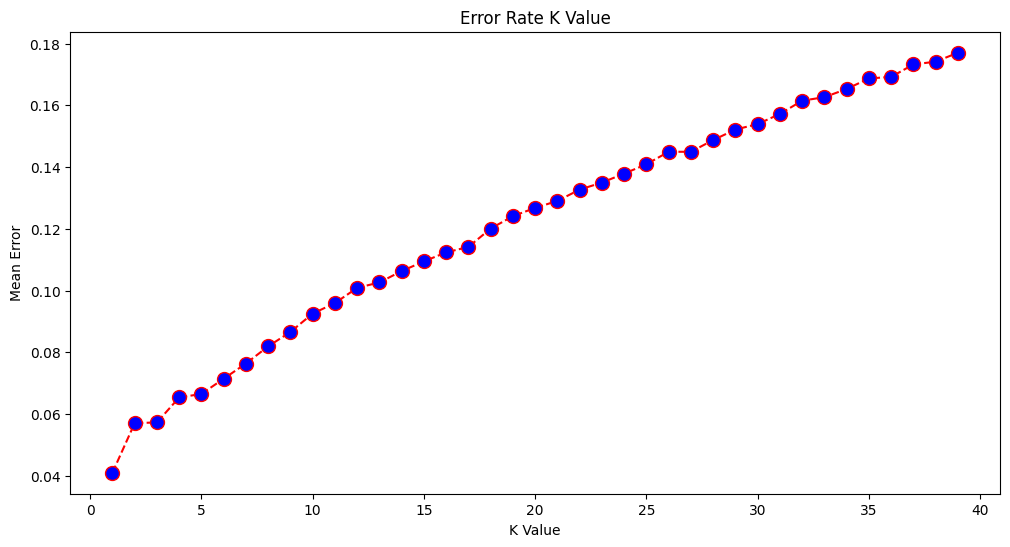

In [14]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

2. Support vector machine learning

In [15]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC
from scipy.stats import uniform


svm = SVC(C=0.1, kernel='rbf', gamma=0.01)
svm.fit(X_train,y_train)
yPredForSvm=svm.predict(X_test)

from sklearn.svm import SVC
svm = SVC(C=0.1, kernel='rbf', gamma=0.01)
svm.fit(X_train,y_train)
yPredForSvm=svm.predict(X_test)

param_dist = {
    'C': uniform(0.1, 100),
    'kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
    'gamma': uniform(0.001, 1)
}

random_search = RandomizedSearchCV(SVC(), param_distributions=param_dist, n_iter=100, cv=5, scoring='accuracy', verbose=2, random_state=42)

random_search.fit(X_train, y_train)

Fitting 5 folds for each of 100 candidates, totalling 500 fits
[CV] END C=37.55401188473625, gamma=0.9517143064099162, kernel=poly; total time=   4.8s
[CV] END C=37.55401188473625, gamma=0.9517143064099162, kernel=poly; total time=   4.4s
[CV] END C=37.55401188473625, gamma=0.9517143064099162, kernel=poly; total time=   4.1s
[CV] END C=37.55401188473625, gamma=0.9517143064099162, kernel=poly; total time=   3.7s
[CV] END C=37.55401188473625, gamma=0.9517143064099162, kernel=poly; total time=   3.8s
[CV] END C=78.06910002727692, gamma=0.597850157946487, kernel=rbf; total time=  26.6s
[CV] END C=78.06910002727692, gamma=0.597850157946487, kernel=rbf; total time=  30.9s
[CV] END C=78.06910002727692, gamma=0.597850157946487, kernel=rbf; total time=  27.4s
[CV] END C=78.06910002727692, gamma=0.597850157946487, kernel=rbf; total time=  35.8s
[CV] END C=78.06910002727692, gamma=0.597850157946487, kernel=rbf; total time=  30.3s
[CV] END C=15.699452033620265, gamma=0.05908361216819946, kernel=si

RandomizedSearchCV(cv=5, estimator=SVC(), n_iter=100,
                   param_distributions={'C': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x00000216C1C1C610>,
                                        'gamma': <scipy.stats._distn_infrastructure.rv_continuous_frozen object at 0x00000216B96CA4D0>,
                                        'kernel': ['linear', 'rbf', 'poly',
                                                   'sigmoid']},
                   random_state=42, scoring='accuracy', verbose=2)

In [19]:
random_search.best_params_
# {'C': 40.483617105804086, 'gamma': 0.06589224710898156, 'kernel': 'rbf'}

{'C': 40.483617105804086, 'gamma': 0.06589224710898156, 'kernel': 'rbf'}

: 

In [16]:
import sklearn.metrics as sm

# print("accuracy score for Support vector machine learning",sm.accuracy_score(label_test,pred))
# print("precision_score for Support vector machine learning",sm.precision_score(label_test,pred,average='micro'))
# print("f1 score for Support vector machine learning",sm.f1_score(label_test,pred,average='micro'))
# print("recall score for Support vector machine learning",sm.recall_score(label_test,pred,average='micro'))
print(classification_report(y_test, yPredForSvm))
print(accuracy_score(y_test, yPredForSvm))

              precision    recall  f1-score   support

           A       0.80      0.81      0.80       348
           B       0.90      0.99      0.94       346
           C       0.89      0.95      0.92       321
           D       0.97      0.73      0.83       352
           E       0.86      0.86      0.86       342
           F       0.96      0.90      0.93       341
           G       0.99      0.98      0.99       376
           H       0.99      0.99      0.99       326
           I       0.77      0.92      0.84       348
           K       0.62      0.82      0.71       334
           L       0.96      0.89      0.92       305
           M       0.62      0.71      0.66       306
           N       0.79      0.65      0.71       347
           O       0.70      0.91      0.80       304
           P       0.90      0.87      0.89       324
           Q       0.86      0.87      0.87       326
           R       0.65      0.62      0.64       290
           S       0.55    

# 6. Intialize Mediapipe Hands for alphabet recognition.

In [17]:
# Initialize mediapipe hand

mp_drawing = mp.solutions.drawing_utils
mp_hands = mp.solutions.hands

In [ ]:
# Initialize mediapipe hand capture webcam

cap = cv2.VideoCapture(0)
with mp_hands.Hands(
    max_num_hands = 1,
    min_detection_confidence=0.5,
    min_tracking_confidence=0.5) as hands:
    while cap.isOpened():
        success, image = cap.read()

        if not success:
            print("Ignoring empty camera frame.")
            # If loading a video, use 'break' instead of 'continue'.
            continue

        # Flip the image horizontally for a later selfie-view display, and convert
        # the BGR image to RGB.
        image = cv2.cvtColor(cv2.flip(image, 1), cv2.COLOR_BGR2RGB)

        # To improve performance, optionally mark the image as not writeable to
        # pass by reference.
        image.flags.writeable = False
        results = hands.process(image)

        # Draw the hand annotations on the image.
        image.flags.writeable = True
        image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR)
        if results.multi_hand_landmarks:
            for hand_landmarks in results.multi_hand_landmarks:
                coords = hand_landmarks.landmark
                mp_drawing.draw_landmarks(image, hand_landmarks, mp_hands.HAND_CONNECTIONS)
                coords = list(np.array([[landmark.x, landmark.y] for landmark in coords]).flatten())
                coords = scaler.transform([coords])
                
                # Alternative for dataset using z coordinates.
                # Z coordinates is not recommended, since you need to adjust your distance from camera.
#                 coords = list(np.array([[landmark.x, landmark.y, landmark.z] for landmark in coords]).flatten())
                
                predicted = svm.predict(coords)

            # Get status box
            cv2.rectangle(image, (0,0), (100, 60), (245, 90, 16), -1)

            # Display Class
            cv2.putText(image, 'CLASS'
                        , (20,15), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 0), 1, cv2.LINE_AA)
            cv2.putText(image, str(predicted[0])
                        , (20,45), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)

        cv2.imshow('MediaPipe Hands', image)

        # Press esc to close webcam
        if cv2.waitKey(5) & 0xFF == 27:
            break
cap.release()
cv2.destroyAllWindows()
